## ✋✊✌️ Rock Paper Scissors Image Recognition

Given *images of hands making rock, paper, and scissors gestures*, let's try to classify the **gesture** in a given image.

We will use a Tensorflow/Keras convolutional neural network to make our predictions.

Data source: https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
train_dir = 'Rock-Paper-Scissors/train'
test_dir = 'Rock-Paper-Scissors/test'

### Visualizing Image Augmentation

In [3]:
sample_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 90,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2
)

sample_images = sample_generator.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    color_mode = 'rgb',
    class_mode = None,
    batch_size = 1,
    shuffle = True,
    seed = 42
)

Found 2520 images belonging to 3 classes.


In [4]:
next(sample_images)[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.9960785 , 0.9960785 , 0.9960785 ],
        [0.9960785 , 0.9960785 , 0.9960785 ],
        [0.9960785 , 0.9960785 , 0.9960785 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.9953475 , 0.9953475 , 0.9953475 ],
        [0.9944368 , 0.9944368 , 0.9944368 ],
        [0.99352616, 0.99352616, 0.99352616]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.9931744 , 0.9931744 , 0.9931744 ],
        [0.994085  , 0.994085  , 0.994085  ],
        [0.9949957 , 0.9949957 , 0.9949957 ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

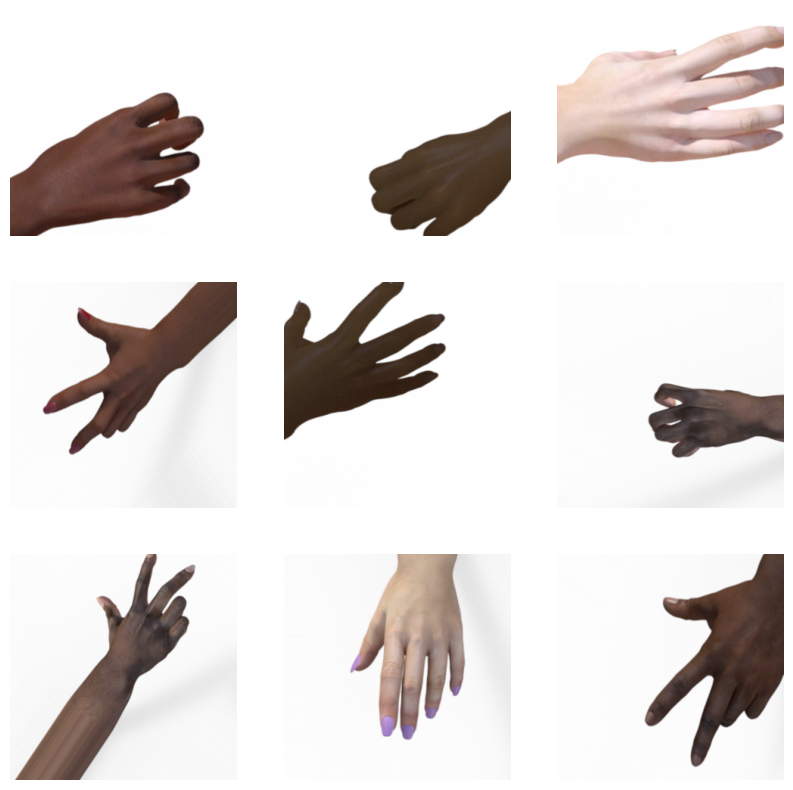

In [5]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = next(sample_images)[0]
    plt.imshow(img)
    plt.axis('off')

plt.show()

#### Creating Generators

In [6]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 90,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2
)

test_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.7
)

In [7]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42
)

val_images = test_generator.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training'
)

test_images = test_generator.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    subset = 'validation'
)

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


### Training

In [ ]:
inputs = tf.keras.Input(shape=(150, 150, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3345 - loss: 6.5513 - val_accuracy: 0.3860 - val_loss: 1.0671
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.4472 - loss: 1.0435 - val_accuracy: 0.5789 - val_loss: 0.9657
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4948 - loss: 0.9912 - val_accuracy: 0.6316 - val_loss: 0.9254
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5460 - loss: 0.9085 - val_accuracy: 0.6667 - val_loss: 0.6860
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5484 - loss: 0.8801 - val_accuracy: 0.6842 - val_loss: 0.7835
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.5393 - loss: 0.8912 - val_accuracy: 0.6316 - val_loss: 0.7688
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5937 - loss: 0.8294 - val_accuracy: 0.6579 - val_loss: 0.8247
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.5754 - loss: 0.8333 - val_accuracy: 0.